In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from train_nn import CombiningDataGen, train_model
from recognizer import create_recognizer

np.set_printoptions(precision=1, suppress=True, linewidth=150)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.which'] = "both"
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams["legend.loc"] = 'upper right'

## 3x3 DOE, 8 beam combining case

Compare a “continuous uniform” distribution v.s. an orthogonal basis using a special orthogonal group
No environmental phase drifting, no double frame training.

In [2]:
config = {
 'n_samples': 8000,
 'M': 3,
 'dither_range_deg': 20,
 'phs_drift_step_deg': 0,
 'rms_measure_noise': 0.1,
 'double_frame': False,
 'ortho_sampling': False
}
dataset = CombiningDataGen(**config)
net = create_recognizer(
    double_frame=config['double_frame'],
    nn_config='3x3')
net_trained, df = train_model(net, dataset, device='cpu', n_epochs=50)

[ 1/50] train_loss: 9.85 deg, valid_loss: 7.33 deg
[ 2/50] train_loss: 5.76 deg, valid_loss: 4.55 deg
[ 3/50] train_loss: 4.59 deg, valid_loss: 4.41 deg
[ 4/50] train_loss: 4.51 deg, valid_loss: 4.36 deg
[ 5/50] train_loss: 4.47 deg, valid_loss: 4.32 deg
[ 6/50] train_loss: 4.45 deg, valid_loss: 4.31 deg
[ 7/50] train_loss: 4.40 deg, valid_loss: 4.26 deg
[ 8/50] train_loss: 4.35 deg, valid_loss: 4.18 deg
[ 9/50] train_loss: 4.25 deg, valid_loss: 4.14 deg
[10/50] train_loss: 4.16 deg, valid_loss: 4.10 deg
[11/50] train_loss: 4.09 deg, valid_loss: 4.04 deg
[12/50] train_loss: 4.05 deg, valid_loss: 4.08 deg
[13/50] train_loss: 3.99 deg, valid_loss: 3.99 deg
[14/50] train_loss: 3.95 deg, valid_loss: 3.98 deg
[15/50] train_loss: 3.94 deg, valid_loss: 3.93 deg
[16/50] train_loss: 3.91 deg, valid_loss: 3.97 deg
[17/50] train_loss: 3.90 deg, valid_loss: 3.90 deg
[18/50] train_loss: 3.86 deg, valid_loss: 3.94 deg
[19/50] train_loss: 3.86 deg, valid_loss: 3.93 deg
[20/50] train_loss: 3.83 deg, v

In [3]:
config['ortho_sampling'] = True
dataset = CombiningDataGen(**config)
net_trained_orth, df_orth = train_model(net, dataset, device='cpu', n_epochs=50)

[ 1/50] train_loss: 3.25 deg, valid_loss: 3.20 deg
[ 2/50] train_loss: 3.09 deg, valid_loss: 3.11 deg
[ 3/50] train_loss: 3.04 deg, valid_loss: 3.09 deg
[ 4/50] train_loss: 3.02 deg, valid_loss: 3.05 deg
[ 5/50] train_loss: 3.01 deg, valid_loss: 3.09 deg
[ 6/50] train_loss: 3.01 deg, valid_loss: 3.09 deg
[ 7/50] train_loss: 2.99 deg, valid_loss: 3.08 deg
[ 8/50] train_loss: 2.99 deg, valid_loss: 3.08 deg
[ 9/50] train_loss: 2.99 deg, valid_loss: 3.09 deg
[10/50] train_loss: 2.98 deg, valid_loss: 3.07 deg
[11/50] train_loss: 2.98 deg, valid_loss: 3.05 deg
[12/50] train_loss: 2.98 deg, valid_loss: 3.08 deg
[13/50] train_loss: 2.97 deg, valid_loss: 3.07 deg
[14/50] train_loss: 2.97 deg, valid_loss: 3.08 deg
[15/50] train_loss: 2.97 deg, valid_loss: 3.09 deg
[16/50] train_loss: 2.97 deg, valid_loss: 3.08 deg
[17/50] train_loss: 2.97 deg, valid_loss: 3.09 deg
[18/50] train_loss: 2.96 deg, valid_loss: 3.09 deg
Early stopping


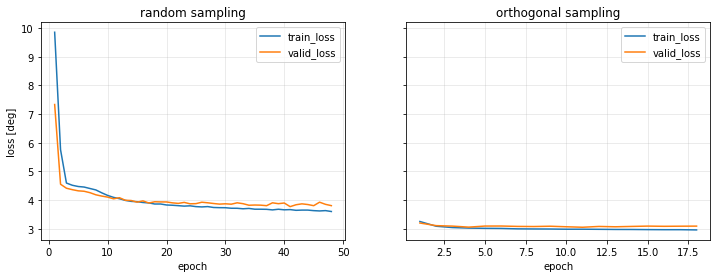

In [4]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,4))
df.plot(title='random sampling', xlabel='epoch', ylabel='loss [deg]', ax=axes[0]);
df_orth.plot(title='orthogonal sampling', xlabel='epoch', ylabel='loss [deg]', ax=axes[1]);

## double frame training, with environmental phase drift

In [5]:
phs_drift_step_deg = 2
rms_measure_noise = 0.1
config = {
 'n_samples': 40000,
 'M': 3,
 'double_frame': True,
 'dither_range_deg': 20,
 'phs_drift_step_deg': phs_drift_step_deg,
 'ortho_sampling': True,
 'rms_measure_noise': rms_measure_noise
}
dataset_double = CombiningDataGen(**config)
net_double = create_recognizer(
    double_frame=config['double_frame'],
    nn_config='3x3')
net_trained_double, df_double = train_model(net_double, dataset_double, device='cpu', n_epochs=40)

[ 1/40] train_loss: 7.07 deg, valid_loss: 7.07 deg
[ 2/40] train_loss: 7.07 deg, valid_loss: 7.07 deg
[ 3/40] train_loss: 7.06 deg, valid_loss: 7.06 deg
[ 4/40] train_loss: 7.05 deg, valid_loss: 7.04 deg
[ 5/40] train_loss: 7.00 deg, valid_loss: 6.99 deg
[ 6/40] train_loss: 6.92 deg, valid_loss: 6.90 deg
[ 7/40] train_loss: 6.82 deg, valid_loss: 6.80 deg
[ 8/40] train_loss: 6.73 deg, valid_loss: 6.75 deg
[ 9/40] train_loss: 6.65 deg, valid_loss: 6.67 deg
[10/40] train_loss: 6.58 deg, valid_loss: 6.61 deg
[11/40] train_loss: 6.52 deg, valid_loss: 6.55 deg
[12/40] train_loss: 6.45 deg, valid_loss: 6.49 deg
[13/40] train_loss: 6.40 deg, valid_loss: 6.45 deg
[14/40] train_loss: 6.36 deg, valid_loss: 6.40 deg
[15/40] train_loss: 6.33 deg, valid_loss: 6.38 deg
[16/40] train_loss: 6.29 deg, valid_loss: 6.35 deg
[17/40] train_loss: 6.27 deg, valid_loss: 6.32 deg
[18/40] train_loss: 6.25 deg, valid_loss: 6.33 deg
[19/40] train_loss: 6.23 deg, valid_loss: 6.29 deg
[20/40] train_loss: 6.21 deg, v

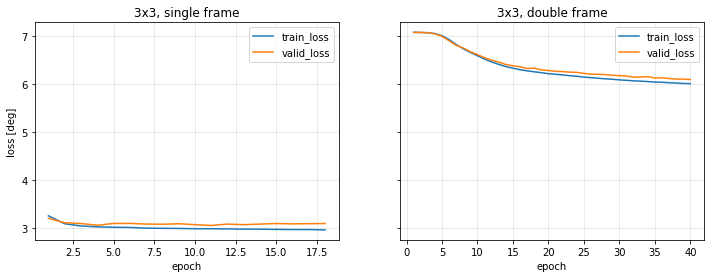

In [6]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,4))
df_orth.plot(title='3x3, single frame', xlabel='epoch', ylabel='loss [deg]', ax=axes[0]);
df_double.plot(title='3x3, double frame', xlabel='epoch', ylabel='loss [deg]', ax=axes[1]);

## orthogonal dithering in N^2 space

In [20]:
from scipy.stats import ortho_group
np_random = np.random.RandomState()

def wrap_phase(arr, discont=180):
    return (arr + discont) % (2 * discont) - discont

In [22]:
N = 800
dither_range_deg = 45

r = ortho_group.rvs(2, N) * dither_range_deg  # deg

# xy_set = np.cumsum(r.reshape(-1, 2), axis=0)
xy_set = np.cumsum(r[:,0], axis=0)
x, y = wrap_phase(xy_set).T

In [24]:
r1 = np_random.uniform(low=-1, high=1, size=(N, 2)) * dither_range_deg

xy_set = np.cumsum(r1.reshape(-1, 2), axis=0)
x1, y1 = wrap_phase(xy_set).T

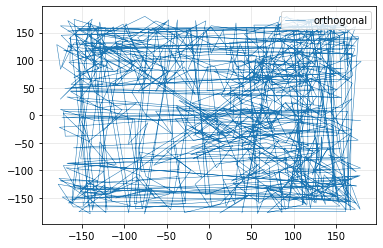

In [25]:
fig, ax = plt.subplots()
ax.plot(x, y, label='orthogonal', lw=.5)
# ax.plot(x1, y1, label='random', lw=.5)
ax.legend()

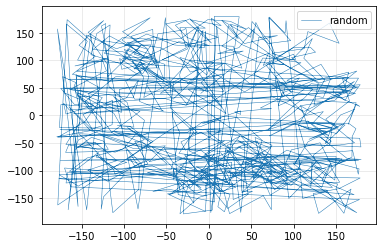

In [26]:
fig, ax = plt.subplots()
# ax.plot(x, y, label='orth', lw=.5)
ax.plot(x1, y1, label='random', lw=.5)
ax.legend()